In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns



## Dynamically build the file path based on your current working directory

In [2]:
path = r"C:\Users\nice\Desktop\sales-forecasting-project (1)\sales-forecasting-project\Milestone1\retail_store_inventory_cleaned.csv"
df = pd.read_csv(path)

## Exploring data

In [3]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,year,month,dayofweek
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Winter,4234.50,2022,1,5
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Winter,9431.50,2022,1,5
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Winter,1809.35,2022,1,5
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Winter,1985.92,2022,1,5
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Winter,1030.96,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter,569.84,2024,1,0
72423,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Winter,4201.07,2024,1,0
72424,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter,389.96,2024,1,0
72425,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Winter,14008.96,2024,1,0


| العمود               | الوصف                        |
|----------------------|------------------------------|
| Date                 | التاريخ                      |
| Store ID             | كود المتجر                   |
| Product ID           | كود المنتج                   |
| Category             | فئة المنتج                   |
| Region               | المنطقة                      |
| Inventory Level      | المخزون الحالي               |
| Units Sold           | عدد الوحدات المباعة          |
| Units Ordered        | عدد الوحدات المطلوبة         |
| Demand Forecast      | التوقعات للطلب              |
| Price                | السعر                        |
| Discount             | الخصم                        |
| Weather Condition    | حالة الطقس                  |
| Holiday/Promotion    | هل في عرض أو عطلة            |
| Competitor Pricing   | سعر المنافس                  |
| Seasonality          | الموسم                       |


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72427 entries, 0 to 72426
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                72427 non-null  object 
 1   Store ID            72427 non-null  object 
 2   Product ID          72427 non-null  object 
 3   Category            72427 non-null  object 
 4   Region              72427 non-null  object 
 5   Inventory Level     72427 non-null  int64  
 6   Units Sold          72427 non-null  int64  
 7   Units Ordered       72427 non-null  int64  
 8   Demand Forecast     72427 non-null  float64
 9   Price               72427 non-null  float64
 10  Discount            72427 non-null  int64  
 11  Weather Condition   72427 non-null  object 
 12  Holiday/Promotion   72427 non-null  int64  
 13  Competitor Pricing  72427 non-null  float64
 14  Seasonality         72427 non-null  object 
 15  Sales               72427 non-null  float64
 16  year

## Basic Statistics

In [5]:
print(df.describe())

       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count      72427.00000  72427.000000   72427.000000     72427.000000   
mean         275.16509    137.705856     110.019385       142.843828   
std          129.76765    108.656966      52.279517       108.855924   
min           50.00000      0.000000      20.000000         0.010000   
25%          163.00000     50.000000      65.000000        55.005000   
50%          274.00000    109.000000     110.000000       114.450000   
75%          387.00000    204.000000     155.000000       209.200000   
max          500.00000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  \
count  72427.000000  72427.000000       72427.000000        72427.000000   
mean      55.130557     10.010217           0.497453           55.144279   
std       26.025696      7.083303           0.499997           26.197211   
min       10.000000      0.000000           0.0

# check if there is an error with units number

In [6]:
df.loc[df["Units Ordered"]+df["Inventory Level"]<df["Units Sold"]]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,year,month,dayofweek


In [7]:
df.loc[df["Units Ordered"]+df["Inventory Level"]<df["Units Sold"]]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,year,month,dayofweek


In [8]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,year,month,dayofweek
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Winter,4234.50,2022,1,5
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Winter,9431.50,2022,1,5
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Winter,1809.35,2022,1,5
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Winter,1985.92,2022,1,5
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Winter,1030.96,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter,569.84,2024,1,0
72423,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Winter,4201.07,2024,1,0
72424,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter,389.96,2024,1,0
72425,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Winter,14008.96,2024,1,0


In [9]:
# Check data types of all columns
print(df.dtypes)


Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
Sales                 float64
year                    int64
month                   int64
dayofweek               int64
dtype: object


In [10]:
print(df["Demand Forecast"].describe())

count    72427.000000
mean       142.843828
std        108.855924
min          0.010000
25%         55.005000
50%        114.450000
75%        209.200000
max        518.550000
Name: Demand Forecast, dtype: float64


In [11]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,year,month,dayofweek
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Winter,4234.50,2022,1,5
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Winter,9431.50,2022,1,5
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Winter,1809.35,2022,1,5
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Winter,1985.92,2022,1,5
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Winter,1030.96,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter,569.84,2024,1,0
72423,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Winter,4201.07,2024,1,0
72424,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter,389.96,2024,1,0
72425,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Winter,14008.96,2024,1,0


C:\Users\nice\AppData\Local\Temp\ipykernel_20468\3692165181.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df[numeric_columns].resample('M').mean()


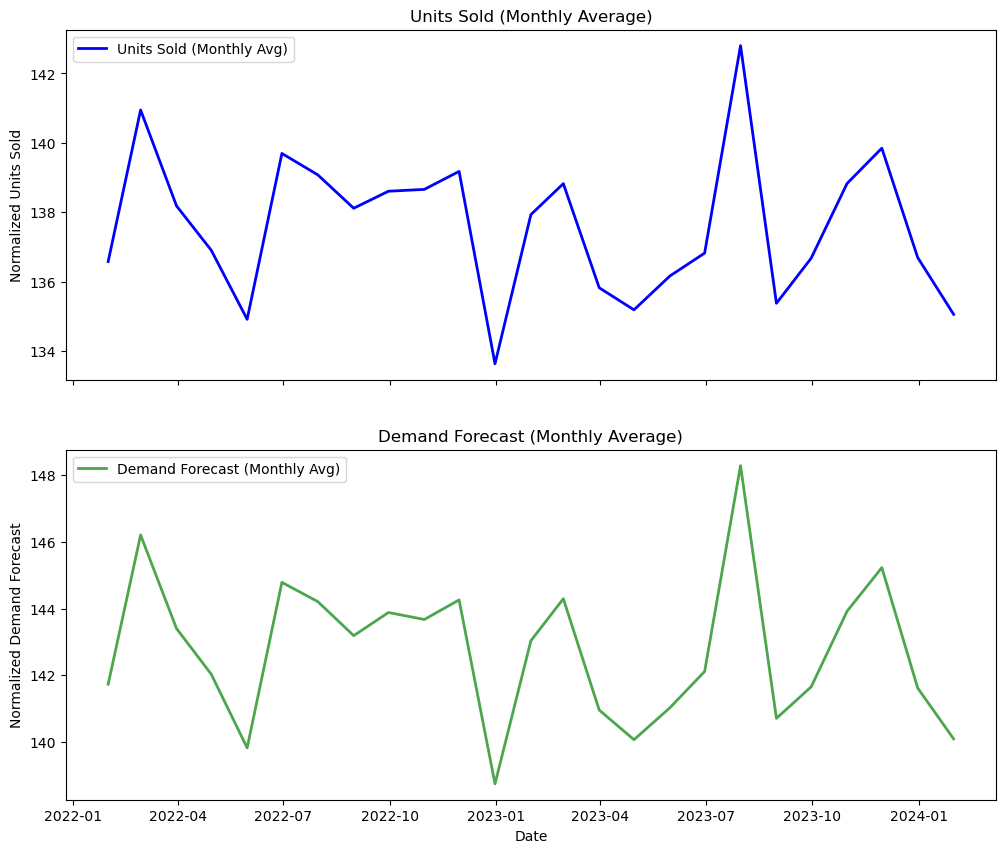

In [12]:
# Reset the index to access the 'Date' column
df.reset_index(inplace=True)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index again
df.set_index('Date', inplace=True)

# Select only numeric columns for resampling
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
monthly_data = df[numeric_columns].resample('M').mean()

# Plot the data
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
axes[0].plot(monthly_data.index, monthly_data['Units Sold'], label='Units Sold (Monthly Avg)', color='blue', linewidth=2)
axes[0].set_title('Units Sold (Monthly Average)')
axes[0].set_ylabel('Normalized Units Sold')
axes[0].legend(fontsize=10, loc='upper left')

axes[1].plot(monthly_data.index, monthly_data['Demand Forecast'], label='Demand Forecast (Monthly Avg)', color='green', alpha=0.7, linewidth=2)
axes[1].set_title('Demand Forecast (Monthly Average)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Normalized Demand Forecast')
axes[1].legend(fontsize=10, loc='upper left')


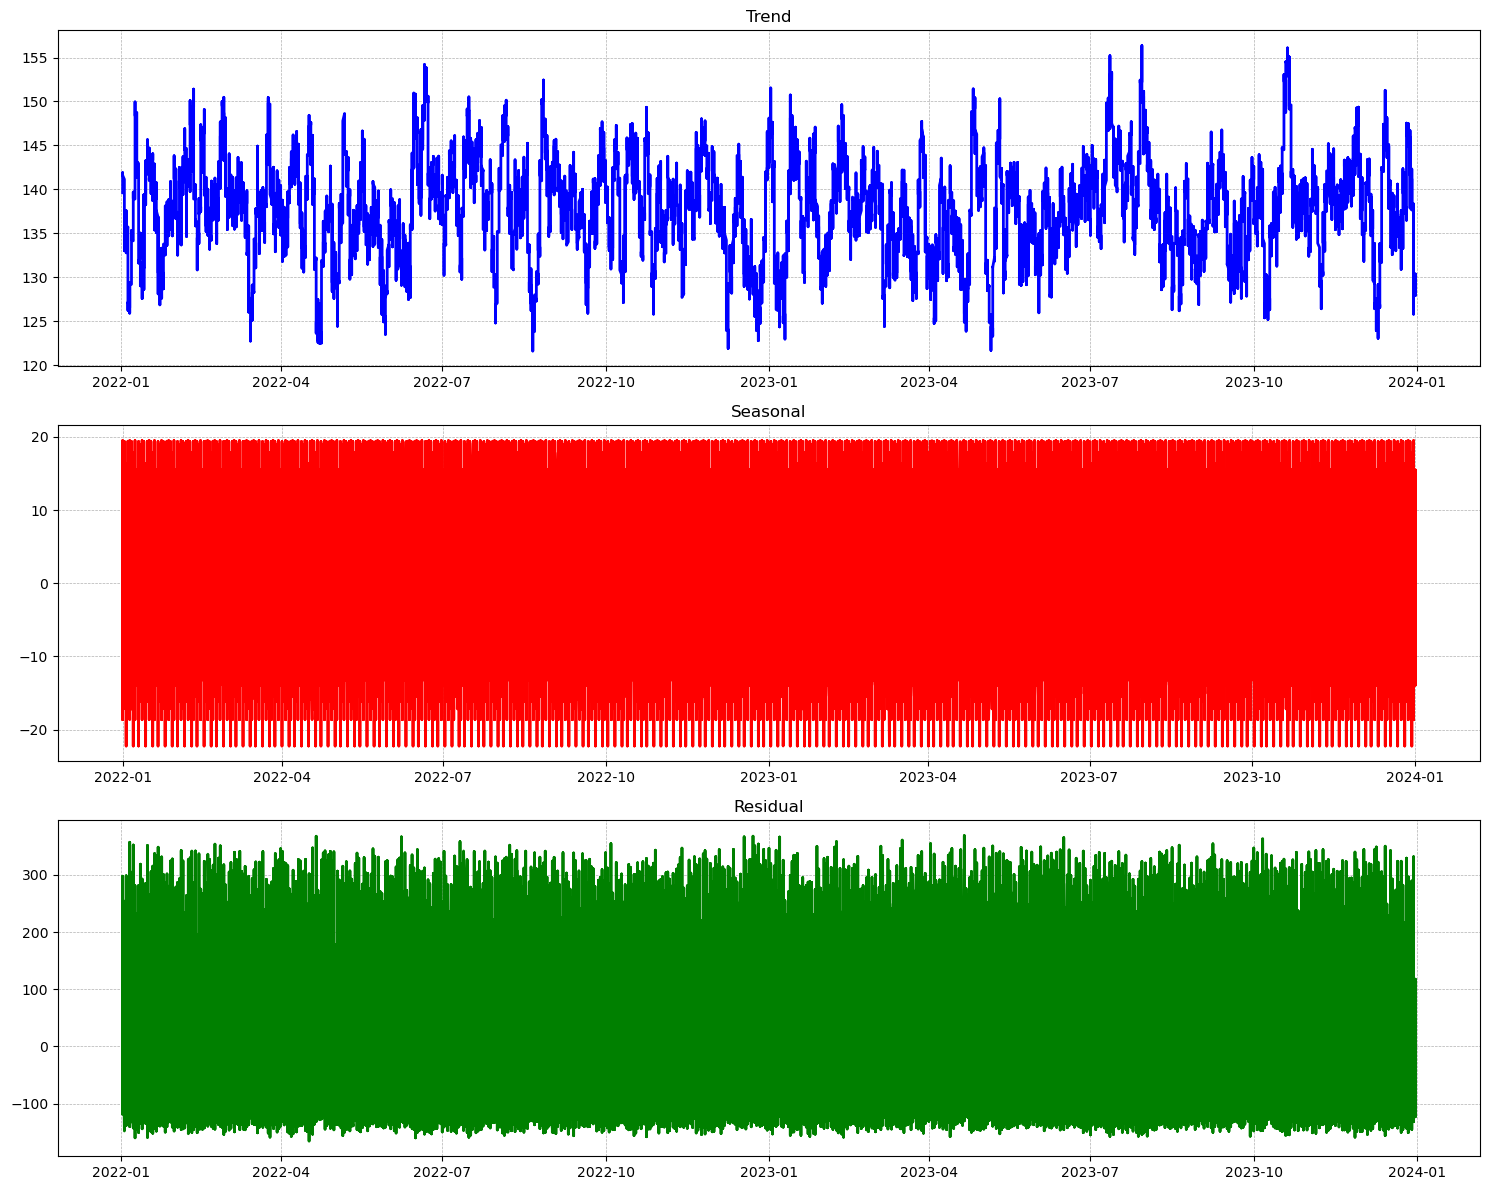

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Units Sold'], model='additive', period=365) # type: ignore
fig, axes = plt.subplots(3, 1, figsize=(15,12))

axes[0].plot(result.trend, linewidth=2,color='blue')
axes[0].set_title('Trend',)
axes[0].grid(True, linestyle='--',linewidth=0.5)

axes[1].plot(result.seasonal,linewidth=2,color="red")
axes[1].set_title('Seasonal',)
axes[1].grid(True, linestyle='--', linewidth=0.5)

axes[2].plot(result.resid,linewidth=2,color="green")
axes[2].set_title('Residual',)
axes[2].grid(True, linestyle='--',linewidth=0.5)

plt.tight_layout()
plt.show()

In [14]:

# Histogram for 'Units Sold'
fig_hist = px.histogram(df, x='Units Sold', nbins=20, title="Distribution of Units Sold")
fig_hist.update_traces(marker_color='skyblue', marker_line_color='black')  # Set color and edge color
fig_hist.update_layout(
    xaxis_title='Units Sold',
    yaxis_title='Frequency',
    bargap=0.1,
    xaxis=dict(showgrid=False)  # Remove grid
)




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'index'),
  Text(1, 0, 'Inventory Level'),
  Text(2, 0, 'Units Sold'),
  Text(3, 0, 'Units Ordered'),
  Text(4, 0, 'Demand Forecast'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Discount'),
  Text(7, 0, 'Holiday/Promotion'),
  Text(8, 0, 'Competitor Pricing'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'year'),
  Text(11, 0, 'month'),
  Text(12, 0, 'dayofweek')])

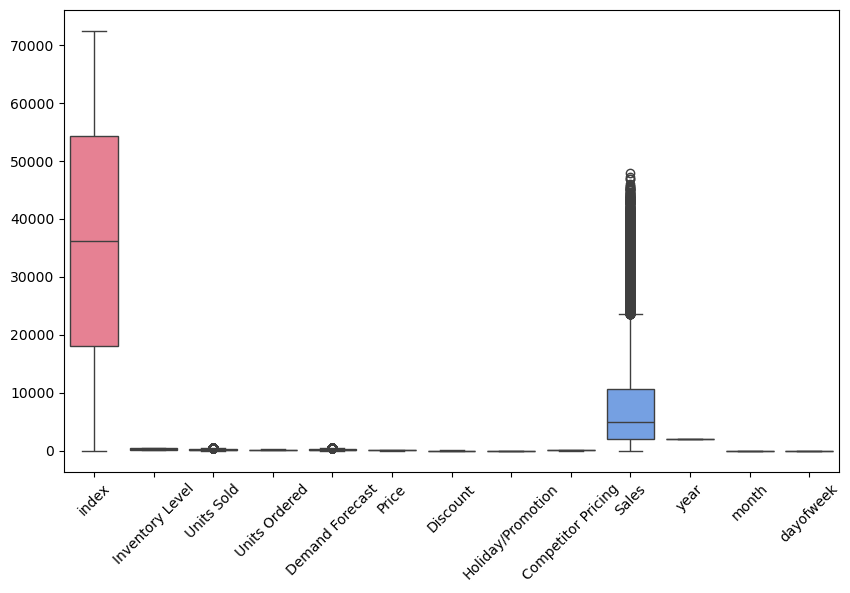

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.xticks(rotation=45)


In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# فلترة البيانات خطوة بخطوة
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # احتفظ فقط بالقيم داخل النطاق المقبول
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'index'),
  Text(1, 0, 'Inventory Level'),
  Text(2, 0, 'Units Sold'),
  Text(3, 0, 'Units Ordered'),
  Text(4, 0, 'Demand Forecast'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'Discount'),
  Text(7, 0, 'Holiday/Promotion'),
  Text(8, 0, 'Competitor Pricing'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'year'),
  Text(11, 0, 'month'),
  Text(12, 0, 'dayofweek')])

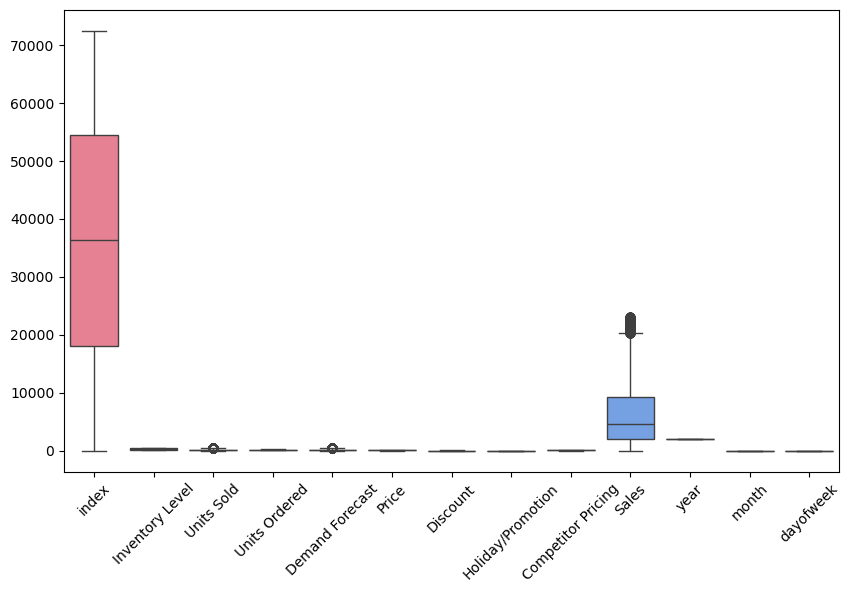

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.xticks(rotation=45)


In [18]:
df["Store ID"].groupby(df["Region"]).unique()

Region
East     [S001, S002, S003, S004, S005]
North    [S001, S002, S003, S004, S005]
South    [S001, S002, S003, S004, S005]
West     [S001, S002, S003, S004, S005]
Name: Store ID, dtype: object

## The next plot shows the strong correlation between numberic values

In [19]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot Heatmap using Plotly

fig_corr = px.imshow(corr_matrix, text_auto=True, title="Correlation Heatmap")
fig_corr.update_layout(
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)
fig_corr.show()


In [20]:
# Aggregating sales by 'Category'
category_sales = df.groupby('Category')['Units Sold'].sum().reset_index()

# Plotting bar chart for sales by category using Plotly
fig_category_sales = px.bar(category_sales, x='Category', y='Units Sold', title="Total Units Sold by Category")
fig_category_sales.update_layout(
    xaxis_title='Category',
    yaxis_title='Total Units Sold',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)
fig_category_sales.show()


## We can notice that price don't have effect on the number of sold items

In [21]:

fig = px.scatter(df, x='Price', y='Units Sold', 
                 title="Scatter Plot of Price vs Units Sold", 
                 labels={'Price': 'Price', 'Units Sold': 'Units Sold'})
fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Units Sold',
    template='plotly_dark',  
)
fig.show()


In [22]:
df.drop(columns=["index"], inplace=True)

In [23]:
df.reset_index(inplace=True)


In [24]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales,year,month,dayofweek
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Winter,4234.50,2022,1,5
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Winter,9431.50,2022,1,5
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Winter,1809.35,2022,1,5
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Winter,1985.92,2022,1,5
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Winter,1030.96,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67995,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter,569.84,2024,1,0
67996,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Winter,4201.07,2024,1,0
67997,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter,389.96,2024,1,0
67998,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Winter,14008.96,2024,1,0


In [25]:
df.to_csv(r"C:\Users\nice\Desktop\sales-forecasting-project (1)\sales-forecasting-project\data\processed\processed_data.csv", index=False)
